In [1]:
import dask.dataframe as dd

from rxitect.generator.datamodules.chembl_datamodule import ChemblSmilesDataModule
from rxitect.generator.datamodules.components.molecule_dataset import MoleculeDataset
from rxitect.structs.vocabulary import SmilesVocabulary

/home/julius/miniconda3/envs/rxt-dev/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
voc = SmilesVocabulary(vocabulary_filepath="../data/processed/smiles_voc.txt")

In [4]:
data = dd.read_table("../data/processed/smiles_chembl_corpus.tsv").head(n=1000)
data

,smiles,token
0,CCOc1ccc2[nH]nc(-c3cc(N4CC(F)C(F)C4)ncn3)c2c1,C C O c 1 c c c 2 [nH] n c ( - c 3 c c ( N 4 C...
1,N=C(N)Nc1nnn(Cc2cccc(Cn3nnc(C(=N)N)n3)c2)n1,N = C ( N ) N c 1 n n n ( C c 2 c c c c ( C n ...
2,CCCCNC(=O)c1cnc(S)n1C(CC)c1ccc(F)c(F)c1,C C C C N C ( = O ) c 1 c n c ( S ) n 1 C ( C ...
3,CC(=O)Oc1ccc(I)cc1C(=O)Nc1ccc(Cl)cc1,C C ( = O ) O c 1 c c c ( I ) c c 1 C ( = O ) ...
4,COc1ccc(C(=O)N2CCN(Cc3ccc(-c4ccncc4)cc3)CC2)cc1,C O c 1 c c c ( C ( = O ) N 2 C C N ( C c 3 c ...
...,...,...
995,CCOC(=O)C=C1CC(C)(CC)CC(=O)N1Cc1ccc(-c2ccccc2-...,C C O C ( = O ) C = C 1 C C ( C ) ( C C ) C C ...
996,CCCCC(=O)NC(=S)Nc1ccc(Cl)c(C(=O)O)c1,C C C C C ( = O ) N C ( = S ) N c 1 c c c ( L ...
997,O=C(NCc1ccccc1)NCC(CCCN1CCC(O)(c2ccc(Cl)cc2)CC...,O = C ( N C c 1 c c c c c 1 ) N C C ( C C C N ...
998,Cc1nc(N)c2ccn(C3OC(CO)C(O)C3O)c2n1,C c 1 n c ( N ) c 2 c c n ( C 3 O C ( C O ) C ...


In [10]:
ds = MoleculeDataset(data=data, vocabulary=voc)

In [11]:
ds[0].reshape(-1).shape

torch.Size([100])

In [12]:
from torch.utils.data import DataLoader

dl = DataLoader(ds, batch_size=128, pin_memory=True)

In [13]:
test_batch = next(iter(dl))
test_batch

tensor([[19, 19, 24,  ...,  0,  0,  0],
        [23, 17, 19,  ...,  0,  0,  0],
        [19, 19, 19,  ...,  0,  0,  0],
        ...,
        [19, 19, 24,  ...,  0,  0,  0],
        [19, 24, 19,  ...,  0,  0,  0],
        [24, 17, 19,  ...,  0,  0,  0]])

In [14]:
reshaped = test_batch.reshape(128, 100)

In [17]:
import matplotlib.pyplot as plt


plt.matshow(reshaped)

NameError: name 'reshaped' is not defined

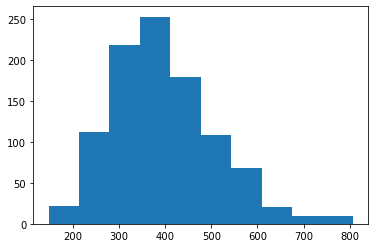

In [16]:
from rdkit.Chem import PandasTools, Descriptors

PandasTools.AddMoleculeColumnToFrame(data,'smiles','ROMol')
data["MW"] = data.ROMol.apply(Descriptors.MolWt)
_ = plt.hist(data["MW"])

In [6]:
mydm = ChemblSmilesDataModule("../data/processed/smiles_chembl_corpus.tsv", "../data/processed/smiles_voc.txt", train_val_test_split=(70_000, 10_000, 20_000))

In [7]:
mydm.prepare_data()
mydm.setup()

In [13]:
vdl = mydm.val_dataloader()

In [15]:
val_batch = next(iter(vdl))
val_batch

tensor([[23,  2, 19,  ...,  0,  0,  0],
        [19, 19, 19,  ...,  0,  0,  0],
        [19, 24, 80,  ...,  0,  0,  0],
        ...,
        [24, 17, 19,  ...,  0,  0,  0],
        [19, 81,  8,  ...,  0,  0,  0],
        [19, 19,  4,  ...,  0,  0,  0]])

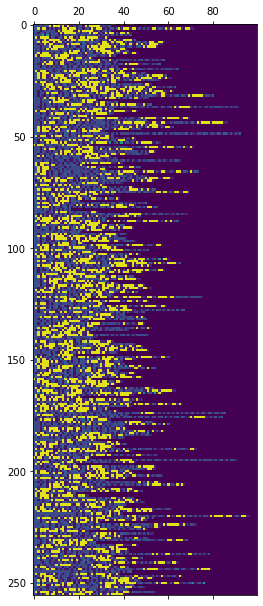

In [18]:
plt.matshow(val_batch)